## ASSET CLASSES

Use this utlity to update the correlations between asset classes in universe/asset-classes.csv

input files:
- asset-classes-2-etf.csv: mapping of asset classes to a representative ETF to use for calculating correlations
- asset-classes-in.csv: asset pairs for which to calculate correlations
- investment-options-in.csv: header for investment-options.csv

output files:
- symbols-cache/'symbol'.csv: timeseries for each symbol 
- symbols-timeseries.csv: compiled timeseries for symbols
- asset-classes.csv: asset class pairs with correlations
- investment-options.csv: you can use asset classes as an investment galaxy

Globals

In [1]:
# Set refresh_timeseries=True to download timeseries.  Otherwise /symbol-cache is used.
refresh_timeseries = True
throttle_limit=100
wait_time=30

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import brownbear as bb

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [4]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [5]:
# asset2etf dict provides a mapping from the asset name to a representative ETF.
asset2etf = pd.read_csv('asset-classes-2-etf.csv', skip_blank_lines=True, comment='#')
asset2etf = asset2etf.set_index(['Asset Class'])
asset2etf = asset2etf['ETF'].to_dict()
asset2etf

{'US Stocks': 'VTSMX',
 'Global Stocks': 'VXUS',
 'US Bonds': 'AGG',
 'Global Bonds': 'BNDX',
 'Cash Equivalents': 'BIL',
 'Real Estate': 'VNQ',
 'Commodities': 'DBC',
 'Currencies': 'UUP',
 'Managed Futures': 'CTA',
 'Balanced': 'AOM',
 'Risk-Free Asset': 'BIL',
 'US Stocks:Large Cap': 'SPY',
 'US Stocks:Mid Cap': 'MDY',
 'US Stocks:Small Cap': 'IWM',
 'US Stocks:Growth': 'QQQ',
 'US Stocks:Growth and Income': 'VOO',
 'US Stocks:Value': 'IWD',
 'US Stocks:Total Stock Market': 'VTI',
 'US Stocks:Materials': 'XLB',
 'US Stocks:Communication Services': 'XLC',
 'US Stocks:Energy': 'XLE',
 'US Stocks:Financials': 'XLF',
 'US Stocks:Industrials': 'XLI',
 'US Stocks:Technology': 'XLK',
 'US Stocks:Consumer Staples': 'XLP',
 'US Stocks:Real Estate': 'XLRE',
 'US Stocks:Utilities': 'XLU',
 'US Stocks:Healthcare': 'XLV',
 'US Stocks:Consumer Discretionary': 'XLY',
 'Global Stocks:Asia': 'VPL',
 'Global Stocks:Developed Markets': 'EFA',
 'Global Stocks:Emerging Markets': 'EEM',
 'Global Stocks:E

In [6]:
symbols = set(asset2etf.values())

In [7]:
bb.fetch_timeseries(symbols, refresh=refresh_timeseries, throttle_limit=throttle_limit, wait_time=wait_time)
bb.compile_timeseries(symbols)

VTSMX AOK XLP XLF FXF AOA CPER XLY IWM GLD IEUR PALL DBB USO XLB AOM DBE EFA BNDX IYR DBA XLV SLV FXE BITW UUP VPL FXC XLU FXA AGG BWZ JNK AOR TIP LQD CORN MDY CTA EBND EEM FXY JPST SPY CANE BIL IWD QQQ XLC XLE PFF PPLT IBND UGA IEF DBC UNG FXB VNQ TLT BWX VTI XLI VXUS XLK VOO DBP XLRE 


In [8]:
df = pd.read_csv('symbols-timeseries.csv', skip_blank_lines=True, comment='#')
df.set_index("Date", inplace=True)
df

,VTSMX,AOK,XLP,XLF,FXF,AOA,CPER,XLY,IWM,GLD,...,VNQ,TLT,BWX,VTI,XLI,VXUS,XLK,VOO,DBP,XLRE
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,56.90,28.11,43.05,21.33,94.11,42.66,16.28,94.30,124.58,121.33,...,58.32,104.33,25.41,116.14,58.38,39.21,58.50,208.51,32.77,24.81
2019-01-03,55.57,27.99,42.80,20.85,94.38,42.13,16.10,92.26,122.35,122.43,...,58.73,105.52,25.52,113.45,56.61,38.77,55.55,203.53,33.17,24.93
2019-01-04,57.49,28.22,43.71,21.55,94.48,43.17,16.52,95.32,126.92,121.44,...,59.42,104.30,25.50,117.21,58.75,40.03,58.01,210.25,32.95,25.18
2019-01-07,57.99,28.25,43.65,21.57,95.07,43.35,16.45,97.47,129.14,121.86,...,60.00,103.99,25.55,118.39,59.23,40.15,58.53,211.83,33.01,25.39
2019-01-08,58.60,28.29,44.05,21.59,94.92,43.62,16.57,98.55,131.12,121.53,...,61.24,103.72,25.47,119.61,60.04,40.45,59.02,213.88,32.94,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,134.10,37.61,82.68,48.02,100.80,76.41,29.08,198.33,200.77,266.04,...,91.53,91.05,21.90,275.62,132.15,62.43,209.25,515.51,66.21,42.06
2025-03-11,133.24,37.45,81.47,47.61,100.66,76.14,29.90,196.39,200.75,269.16,...,90.46,90.40,21.94,273.69,130.12,62.38,208.40,511.28,67.12,41.62
2025-03-12,133.87,37.39,79.70,47.68,100.68,76.44,30.22,197.53,201.10,270.33,...,90.18,89.86,21.91,275.04,130.11,62.81,211.68,513.76,67.62,41.47


np.float64(0.700903598011685)

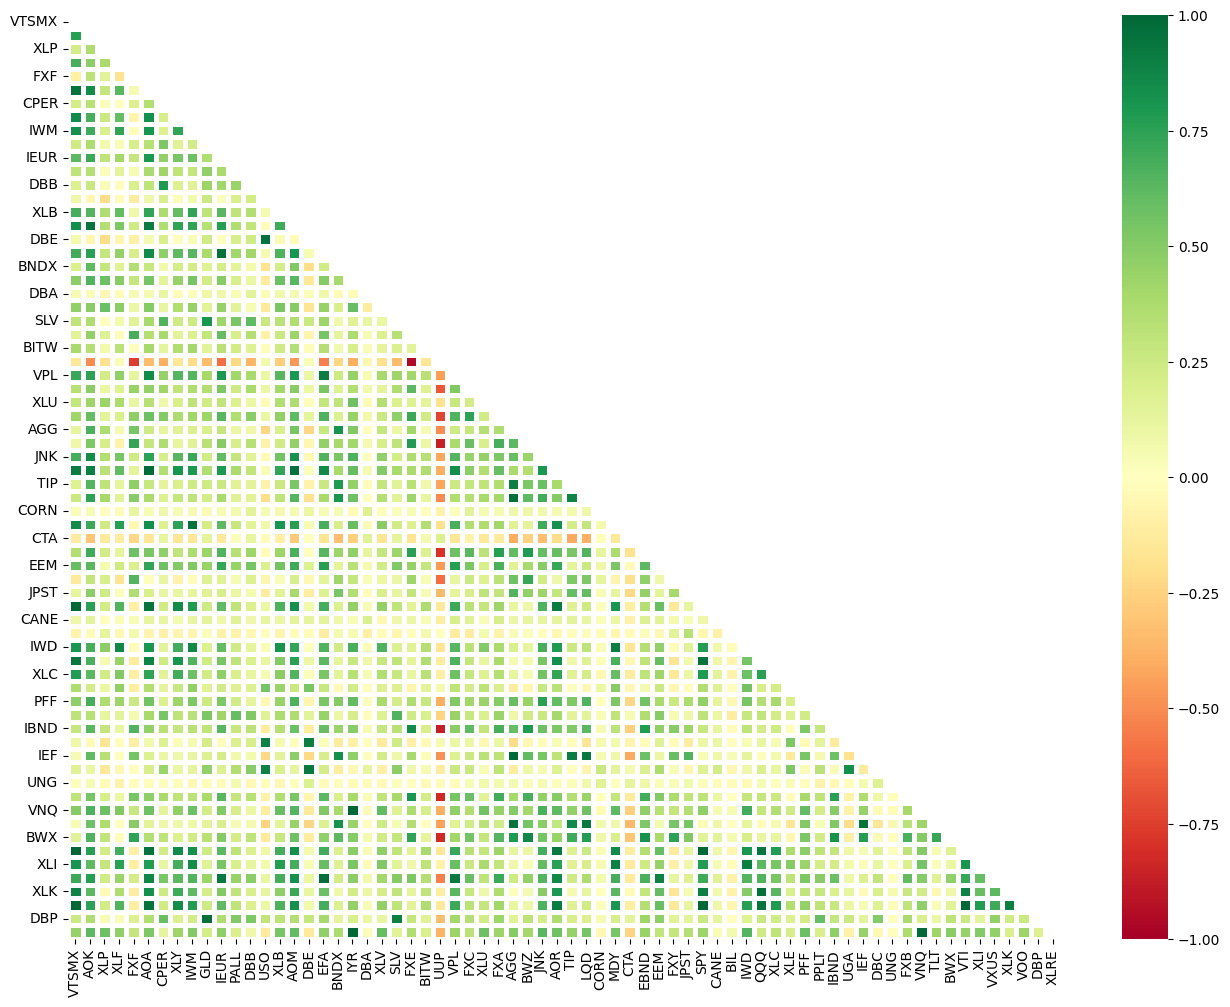

In [9]:
corr_map = bb.correlation_map(df, method='log', days=bb.TRADING_DAYS_PER_YEAR)
# Sample correlation value.
corr_map['SPY']['VXUS']

In [10]:
# Read asset-classes-in.csv
lines = []
with open('asset-classes-in.csv', 'r') as f:
    lines = [line.strip() for line in f]
#lines

In [11]:
# Calculate the pair correlations between the assets and write the resuls to a list.
out = []
for line in lines:
    # Copy empty and comment lines.
    if not line or line.startswith('#'):
        out.append(line)
        continue
    # Split line by comma delimiter; strip the fields.
    fields = line.split(',')
    fields = [field.strip() for field in fields]
    assetA = fields[0].strip('\"')
    assetB = fields[1].strip('\"')
    # copy same asset lines and header
    if assetA == assetB or assetA == 'Asset Class A':
        out.append(line)
        continue
    # Use asset2etf to get a representative ETF for the asset,
    # then calculate the correlation.  The ETF pair correlation is
    # a proxy for the correlation of an asset pair.
    etfA = asset2etf[assetA]
    etfB = asset2etf[assetB]
    corrAB = corr_map.loc[etfA, etfB]
    out.append(f'"{assetA}","{assetB}","{corrAB:0.2f}"')   

In [12]:
# Write out asset-classes.csv
with open('asset-classes.csv', 'w') as f:
    for line in out:
        f.write(line + '\n')

In [13]:
# Sample symbol.
symbol = 'SPY'

In [14]:
annual_returns = bb.annualized_returns(df, timeperiod='daily', years=1)
annual_returns[symbol]

np.float64(10.304058469143262)

In [15]:
# Calculate 1 month, 3 months, 1 year, 3 year, and 5 year annualized returns.
annual_returns_1mo = bb.annualized_returns(df, timeperiod='daily', years=1/12)
annual_returns_3mo = bb.annualized_returns(df, timeperiod='daily', years=3/12)
annual_returns_1yr = bb.annualized_returns(df, timeperiod='daily', years=1)
annual_returns_3yr = bb.annualized_returns(df, timeperiod='daily', years=3)
annual_returns_5yr = bb.annualized_returns(df, timeperiod='daily', years=5)

In [16]:
# Calculate 20 day annualized volatility.
daily_returns = df.pct_change(fill_method=None)
years = bb.TRADING_DAYS_PER_MONTH / bb.TRADING_DAYS_PER_YEAR
vola = bb.annualized_standard_deviation(daily_returns, timeperiod='daily', years=years)
vola[symbol]

np.float64(0.1905050903169383)

In [17]:
# Calculate 20 day annualized downside volatility.
ds_vola = bb.annualized_standard_deviation(daily_returns, timeperiod='daily', years=years, downside=True)
ds_vola[symbol]

np.float64(0.12885085078441355)

In [18]:
# Resample df on a monthly basis.
df.index = pd.to_datetime(df.index)
monthly = df.resample('ME').ffill()
bb.print_full(monthly[symbol])

Date
2019-01-31   245.61
2019-02-28   253.57
2019-03-31   258.16
2019-04-30   268.71
2019-05-31   251.57
2019-06-30   269.08
2019-07-31   273.14
2019-08-31   268.57
2019-09-30   273.80
2019-10-31   279.85
2019-11-30   289.98
2019-12-31   298.40
2020-01-31   298.28
2020-02-29   274.67
2020-03-31   240.37
2020-04-30   270.89
2020-05-31   283.80
2020-06-30   288.83
2020-07-31   305.84
2020-08-31   327.19
2020-09-30   314.94
2020-10-31   307.09
2020-11-30   340.49
2020-12-31   353.11
2021-01-31   349.51
2021-02-28   359.23
2021-03-31   375.54
2021-04-30   395.40
2021-05-31   398.00
2021-06-30   406.93
2021-07-31   416.86
2021-08-31   429.27
2021-09-30   409.26
2021-10-31   437.98
2021-11-30   434.46
2021-12-31   454.55
2022-01-31   430.58
2022-02-28   417.87
2022-03-31   433.57
2022-04-30   395.52
2022-05-31   396.41
2022-06-30   363.72
2022-07-31   397.22
2022-08-31   381.01
2022-09-30   345.79
2022-10-31   373.89
2022-11-30   394.68
2022-12-31   371.93
2023-01-31   395.32
2023-02-28   38

In [19]:
# Calculate monthly returns.
monthly_returns = monthly.pct_change(fill_method=None)
monthly_returns[symbol]

Date
2019-01-31     NaN
2019-02-28    0.03
2019-03-31    0.02
2019-04-30    0.04
2019-05-31   -0.06
              ... 
2024-11-30    0.06
2024-12-31   -0.02
2025-01-31    0.03
2025-02-28   -0.01
2025-03-31   -0.05
Freq: ME, Name: SPY, Length: 75, dtype: float64

In [20]:
# Calculate 1 year, 3 year, and 5 year annualized standard deviation.
std_dev_1yr = bb.annualized_standard_deviation(monthly_returns, timeperiod='monthly', years=1)
std_dev_3yr = bb.annualized_standard_deviation(monthly_returns, timeperiod='monthly', years=3)
std_dev_5yr = bb.annualized_standard_deviation(monthly_returns, timeperiod='monthly', years=5)
std_dev_3yr[symbol]

np.float64(0.17033255059726563)

In [21]:
# Read investment-options-header.csv
lines = []
with open('investment-options-in.csv', 'r') as f:
    lines = [line.strip() for line in f]
# lines

In [22]:
# For each symbol, output the performance metrics 
out = lines.copy()

# This is still slow (2.53 s)
for key, value in asset2etf.items():

    symbol = value
    asset_class = key

    ret_1mo = annual_returns_1mo[symbol]
    ret_3mo = annual_returns_3mo[symbol]
    ret_1yr = annual_returns_1yr[symbol]
    ret_3yr = annual_returns_3yr[symbol]
    ret_5yr = annual_returns_5yr[symbol]

    if np.isnan(ret_3yr): ret_3yr = ret_1yr
    if np.isnan(ret_5yr): ret_5yr = ret_3yr
    
    _vola = vola[symbol]*100
    _ds_vola = ds_vola[symbol]*100
    sd_1yr = std_dev_1yr[symbol]*100
    sd_3yr = std_dev_3yr[symbol]*100
    sd_5yr = std_dev_5yr[symbol]*100

    out.append((
        '"{}","{}","{}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}",'
        '"{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}"'
    ).format(
        asset_class, asset_class, asset_class, ret_1mo, ret_3mo, ret_1yr, ret_3yr,
        ret_5yr, _vola, _ds_vola, sd_1yr, sd_3yr, sd_5yr
    ))

In [23]:
# Write out asset-classes.csv
with open('investment-options.csv', 'w') as f:
    for line in out:
        f.write(line + '\n')